# Bag-of-words

In [156]:
import numpy as np
import pandas as pd
import re
import string
import unidecode #pip install unidecode
%matplotlib inline
import matplotlib.pyplot as plt

# Read original csv file
df0 = pd.read_csv('tweets_public3.csv', encoding='utf-16', index_col='tweet_id', sep=',')
# Keep relevant columns only
df = df0.drop(['retweet_count','is_reply','reply_count','tweet_coord','tweet_location','user_timezone'], axis=1)
#df.head()

### First Step Data cleaning:
- Convert all tweets to lowercase
- Delete URLs, additional white spaces, twitter vocabulary (RT, via, by), numbers, single characters (e.g. q instead of que) and accents.

In [157]:
def basicCleaning(tweet):
    #Convert to lower case
    tweet = tweet.lower()
    #Delete URLs www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    #Remove additional white spaces
    tweet = re.sub('\s+', ' ', tweet)
    #Delete via, rt and by
    #Delete via, rt and by
    tweet = re.sub(r'\b(rt|via|by)\b','',tweet)
    # Remove numbers
    tweet = re.sub(r'\b\d+\b','',tweet)
    # Remove single characters
    tweet = re.sub(r'\b\w\b','',tweet)
    # Remove accents
    tweet = unidecode.unidecode(tweet)
    return tweet

df['text'] = df['text'].apply(basicCleaning)
df.head()

,tweet_created,airline_sentiment,text,newairline_sentiment
tweet_id,,,,
942743012337123328,Mon Dec 18 13:07:04 +0000 2017,positive,"""los pilotos de ryanair desconvocan la huelga ...",positive
926857871916183553,Sat Nov 04 17:05:11 +0000 2017,positive,"@iberia @lavecinarubia si ,por favor las decla...",positive
936979305720090626,Sat Dec 02 15:24:09 +0000 2017,neutral,@iberia me dirias por favor que costo tiene?,neutral
943983853802328064,Thu Dec 21 23:17:43 +0000 2017,negative,"@supermanlopezn @iberia @giroditalia champion,...",negative
938207464457211904,Wed Dec 06 00:44:25 +0000 2017,negative,@srtafarrelldm @klm @iberia eso de avianca es ...,negative


### Second Step Data cleaning
- Remove all users (relevant airline information is already in the dataFrame) and punctuation

In [158]:
def moreCleaning(tweet):
    #Delete @usernames
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove punctuation (includes @, \ and #)
    regex = re.compile('[%s]' % re.escape(string.punctuation+u"¡"+u"¿"+u"€"))
    tweet = re.sub(regex,'',tweet)
    return tweet

df['text'] = df['text'].apply(moreCleaning)
df.head()

,tweet_created,airline_sentiment,text,newairline_sentiment
tweet_id,,,,
942743012337123328,Mon Dec 18 13:07:04 +0000 2017,positive,los pilotos de ryanair desconvocan la huelga t...,positive
926857871916183553,Sat Nov 04 17:05:11 +0000 2017,positive,si por favor las declaraciones de amor entre...,positive
936979305720090626,Sat Dec 02 15:24:09 +0000 2017,neutral,me dirias por favor que costo tiene,neutral
943983853802328064,Thu Dec 21 23:17:43 +0000 2017,negative,champion no vuele mas con esos descarados,negative
938207464457211904,Wed Dec 06 00:44:25 +0000 2017,negative,eso de avianca es verdad mi mama le paso d...,negative


### Tokenizing
Define a list with all word-vectors in the text and remove Spanish stopwords and words such as ['volar','vuelo','vuelos','aerolinea','destino','hacer','si','puede','favor']

In [159]:
from nltk.tokenize import word_tokenize
df['tokens'] = df['text'].apply(word_tokenize)

In [160]:
from nltk.corpus import stopwords

stopWords = set(stopwords.words('spanish'))
# Remove accents
stopWordsNoAccents = [unidecode.unidecode(w) for w in stopWords]

# Add extra airline vocabulary
airlinesList = ['aena','aeromar','aeromexico','aireuropa','airmadrid','airnostrum','americanairlines',
     'avianca','blueair','britishairways','easyjet','emirates','eurowings','flybe','iberia','klm',
     'lufthansa','niki','norwegian','qatar','ryanair','spanair','spiritairlines',
     'tame','vasp','volaris','vueling','westjet','wizzair']
newstopWords = stopWordsNoAccents+airlinesList+['dia','volar','vuelo','vuelos','viaje','viajar','aerolinea',
                                                'destino','destinos','hacer','si','puede','hola','ano',
                                                'favor','click','holaargentina',
                                               'solo']#,'deseadme','suerte','holacolombia','hola','europeos',
                                                #'mejor precio']
def removeStopWords(tweet):
    wordsFiltered = []
    for word in tweet:
        if word not in newstopWords:
            wordsFiltered.append(word.strip())
    return wordsFiltered

df['wordsFiltered'] = df['tokens'].apply(removeStopWords)
df.head()

,tweet_created,airline_sentiment,text,newairline_sentiment,tokens,wordsFiltered
tweet_id,,,,,,
942743012337123328,Mon Dec 18 13:07:04 +0000 2017,positive,los pilotos de ryanair desconvocan la huelga t...,positive,"[los, pilotos, de, ryanair, desconvocan, la, h...","[pilotos, desconvocan, huelga, tras, ver, reco..."
926857871916183553,Sat Nov 04 17:05:11 +0000 2017,positive,si por favor las declaraciones de amor entre...,positive,"[si, por, favor, las, declaraciones, de, amor,...","[declaraciones, amor, rubijarena, pueden, qued..."
936979305720090626,Sat Dec 02 15:24:09 +0000 2017,neutral,me dirias por favor que costo tiene,neutral,"[me, dirias, por, favor, que, costo, tiene]","[dirias, costo]"
943983853802328064,Thu Dec 21 23:17:43 +0000 2017,negative,champion no vuele mas con esos descarados,negative,"[champion, no, vuele, mas, con, esos, descarados]","[champion, vuele, descarados]"
938207464457211904,Wed Dec 06 00:44:25 +0000 2017,negative,eso de avianca es verdad mi mama le paso d...,negative,"[eso, de, avianca, es, verdad, mi, mama, le, p...","[verdad, mama, paso, dos, veces, terrible]"


Transform the lists of filtered words into one single string per airline sentiment to retrieve it to WordCloud

In [161]:
def jointokens(frame):
    tokens_list = frame['wordsFiltered'].tolist()
    sentence = [' '.join(w) for w in tokens_list]
    allsentences = ' '.join(sentence)
    return allsentences

all_text = df.groupby('newairline_sentiment').apply(jointokens)

In [162]:
negatius = word_tokenize(all_text['negative'])
positius = word_tokenize(all_text['positive'])
neutres = word_tokenize(all_text['neutral'])
print(len(positius))

7266


In [163]:
from collections import Counter

intersection = list(set(positius) & set(negatius))
print(len(negatius),len(intersection))

histo=dict()
for token in intersection:
    histo[token] = negatius.count(token)
    
for w in sorted(histo, key=histo.get, reverse=True):
  print(w, histo[w])

24670 1646
maleta 170
avion 161
dias 121
web 120
gracias 117
hace 112
huelga 105
maletas 101
madrid 100
horas 100
equipaje 98
servicio 94
dos 93
aeropuerto 84
vez 81
despues 78
retraso 77
atencion 75
cliente 75
ahora 73
ser 73
billete 72
pilotos 69
pasajeros 68
siempre 67
asi 66
espana 66
hora 65
pagina 65
pues 65
respuesta 64
esperando 63
da 62
hoy 62
EUR 61
puedo 61
via 60
llevo 57
ver 57
mal 57
problema 55
menos 54
peor 54
nunca 53
mismo 53
anos 52
bien 50
personal 50
reserva 50
pasajero 48
tan 47
nadie 47
parece 46
asientos 46
compania 46
reclamacion 46
tierra 46
manana 46
tiempo 45
va 45
comprar 44
telefono 44
diciembre 44
dicen 44
asiento 43
pagar 43
billetes 42
aqui 42
euros 41
navidad 40
pasa 40
dinero 40
empresa 39
casi 39
embarque 39
cada 39
esperar 39
aun 38
linea 38
minutos 38
barcelona 38
cambiar 38
igual 37
avios 37
mano 37
low 37
veces 36
funciona 36
meses 36
pueden 35
ayer 35
cost 35
in 34
cosas 34
tarjeta 34
puerta 33
llego 33
caso 33
problemas 33
ninguna 33
sale 33
ir

oiga 1
sorteo 1
sueno 1
quisiera 1
carino 1
encontrais 1
2o 1
europeos 1
europeas 1
serrat 1
vigor 1
lanzado 1
cubrir 1
prioritario 1
asistentes 1
ganar 1
sigan 1
enfermo 1
rusia 1
averia 1
olviden 1
sinceramente 1
inaugura 1
innovacion 1
pisa 1
scq 1
reves 1
preferencias 1
nov 1
promociones 1
posicionar 1
marcas 1
lloro 1
lorca 1
azafatos 1
eur 1
vs 1
gds 1
austriaca 1
registro 1
bussiness 1
acto 1
mediante 1
favorita 1
empezando 1
sorprendio 1
metido 1
ilusion 1
andalucia 1
vuelen 1
exito 1
bristol 1
canarios 1
propongo 1
ayudarnos 1
magnificos 1
quiza 1
encuentras 1
aplica 1
blackfriday 1
imagenes 1
vistas 1
cabreo 1
ud 1
salieron 1
conseguirlo 1
frecuencia 1
quince 1
tocaron 1
mvd 1
tripulac 1
azafato 1
copenhague 1
nexotur 1
bajate 1
permiso 1
olvide 1
confianza 1
ceo 1
prevision 1
mar 1
alfonso 1
ib3176 1
escapate 1
sal 1
pesos 1
comodos 1
turistas 1
conectar 1
operador 1
sonar 1
resolverlo 1
bonita 1
thanks 1
saltando 1
uk 1
tecnico 1
ingles 1
news 1
especial 1
cuantos 1
apunta 

In [164]:
# Remove intersection
for token in intersection:
    while token in positius: positius.remove(token)
    while token in negatius: negatius.remove(token)
    while token in neutres: neutres.remove(token)
print('madrid' in positius)

False


In [165]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib

def plot_WordCloud(stringplot):
    # STOPWORDS: Nombres aerolíneas y palabras del tema y/o generales nipy_spectral
    ignore = ''
    wc = {'width': 600, 'height': 300, 'random_state': 0}
    fwc = {'background_color':"white",'colormap': matplotlib.cm.nipy_spectral,'stopwords': ignore, **wc}
    wordcloud = WordCloud(**fwc).generate(stringplot)
    plt.imshow(wordcloud)
    plt.axis("off")

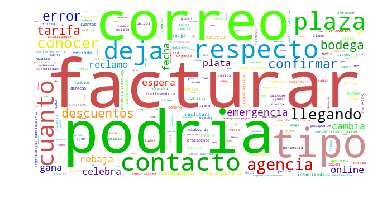

In [166]:
key = 'neutralNOintersection'
sentence = ' '.join(neutres)
plot_WordCloud(sentence) #all_text[key])
fig = plt.gcf()
fig.set_size_inches(6,8)
fitxer = 'BoW'+'_'+key+'.jpg'
fig.savefig(fitxer, bbox_inches='tight',dpi=200)

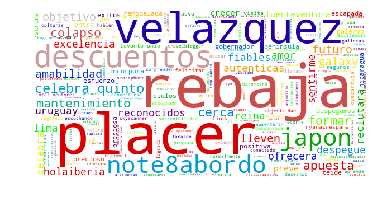

In [167]:
key = 'positiveNOintersection'
sentence = ' '.join(positius)
plot_WordCloud(sentence) #all_text[key])
fig = plt.gcf()
fig.set_size_inches(6,8)
fitxer = 'BoW'+'_'+key+'.jpg'
fig.savefig(fitxer, bbox_inches='tight',dpi=200)

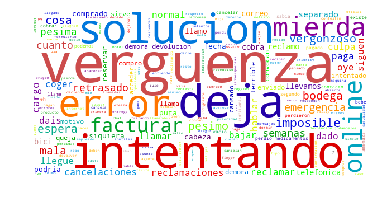

In [168]:
key = 'negativeNOintersection'
sentence = ' '.join(negatius)
plot_WordCloud(sentence) #all_text[key])
fig = plt.gcf()
fig.set_size_inches(6,8)
fitxer = 'BoW'+'_'+key+'.jpg'
fig.savefig(fitxer, bbox_inches='tight',dpi=400)

### BoWs for each day in the sample

In [169]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df['date']= df['tweet_created'].dt.strftime('%Y-%m-%d')
df.head(3)

,tweet_created,airline_sentiment,text,newairline_sentiment,tokens,wordsFiltered,date
tweet_id,,,,,,,
942743012337123328,2017-12-18 13:07:04,positive,los pilotos de ryanair desconvocan la huelga t...,positive,"[los, pilotos, de, ryanair, desconvocan, la, h...","[pilotos, desconvocan, huelga, tras, ver, reco...",2017-12-18
926857871916183553,2017-11-04 17:05:11,positive,si por favor las declaraciones de amor entre...,positive,"[si, por, favor, las, declaraciones, de, amor,...","[declaraciones, amor, rubijarena, pueden, qued...",2017-11-04
936979305720090626,2017-12-02 15:24:09,neutral,me dirias por favor que costo tiene,neutral,"[me, dirias, por, favor, que, costo, tiene]","[dirias, costo]",2017-12-02


In [170]:
# Identify dates with tweets
unicos = df['date'].value_counts()
dates = unicos.index.tolist() # List of unique dates
print(dates)

['2017-12-14', '2017-12-13', '2017-11-30', '2017-12-19', '2017-12-15', '2018-01-03', '2017-12-18', '2017-12-12', '2017-12-22', '2018-01-04', '2017-11-21', '2017-11-29', '2017-11-22', '2017-11-23', '2017-10-25', '2017-11-28', '2017-11-14', '2017-11-27', '2017-10-30', '2017-11-24', '2017-11-07', '2017-12-26', '2017-10-26', '2017-12-05', '2017-12-27', '2017-11-03', '2017-12-01', '2017-12-29', '2017-11-17', '2018-01-08', '2018-01-02', '2017-12-28', '2017-11-13', '2017-11-06', '2017-11-15', '2017-12-17', '2017-11-25', '2017-11-05', '2017-12-03', '2017-12-02', '2017-11-16', '2017-12-04', '2017-12-30', '2017-12-23', '2017-12-24', '2017-11-20', '2017-11-04', '2017-12-16', '2017-11-26', '2017-10-27', '2017-12-06', '2017-11-02', '2017-12-25', '2018-01-01', '2017-12-21', '2017-10-31', '2017-12-31', '2017-11-09', '2017-10-28', '2018-01-05']


KeyboardInterrupt: 

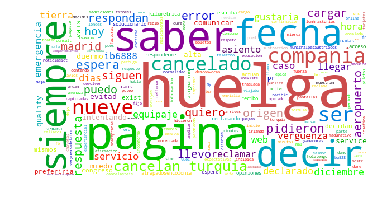

In [171]:
keys = ['positive','negative','neutral']
for dia in dates:
    df_sel = df.loc[df['date'] == dia]
    all_text = df_sel.groupby('newairline_sentiment').apply(jointokens)
    for key in keys:
        tokens = word_tokenize(all_text[key])
        for x in intersection:
            if(x in tokens): 
                tokens.remove(x)
        sentence = ' '.join(tokens)
        plot_WordCloud(sentence)
        fig = plt.gcf()
        fig.set_size_inches(6,8)
        fig.savefig('BoW_'+dia+'_'+key+'.jpg', bbox_inches='tight',dpi=200)